In [11]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pickle
import pandas as pd
from tqdm import tqdm

from graspy.plot import heatmap
from graspy.utils import symmetrize
from graspy.simulations import sbm

from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.mgc import MGC

from simulations import sbm_corr, ER_corr, rho_gaussian_sbm
from utils import triu_no_diag, to_distance_mtx, identity, sbm_params, dcorr_power_two_sided, pearson_power_two_sided

import multiprocessing as mp

In [12]:
AL = np.array([[2, 0], [0, 2]])
BL = np.array([[4, 2], [2, 4]])
A, B = rho_gaussian_sbm(rho=0.1, k=np.array([50, 50]), AL=AL, BL=BL, n=100)

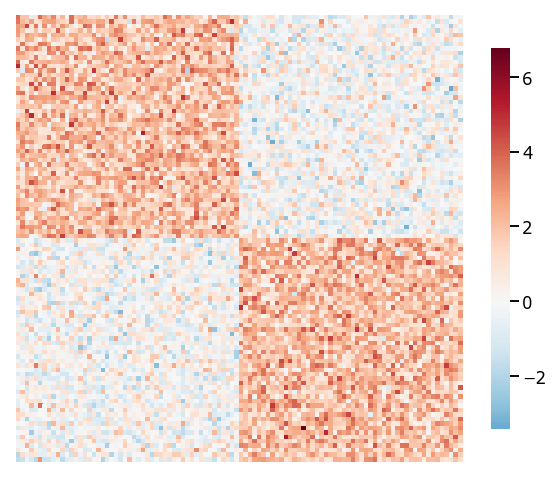

In [13]:
heatmap(A)

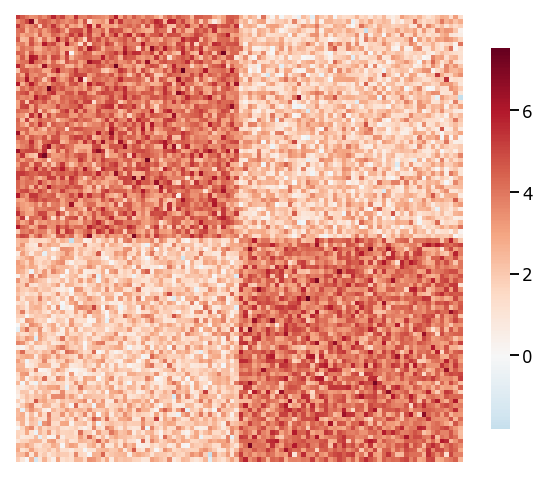

In [14]:
heatmap(B)

In [18]:
AL = np.array([[0]])
BL = np.array([[2]])
A, B = rho_gaussian_sbm(rho=0.8, k=np.array([100]), AL=AL, BL=BL, n=100)

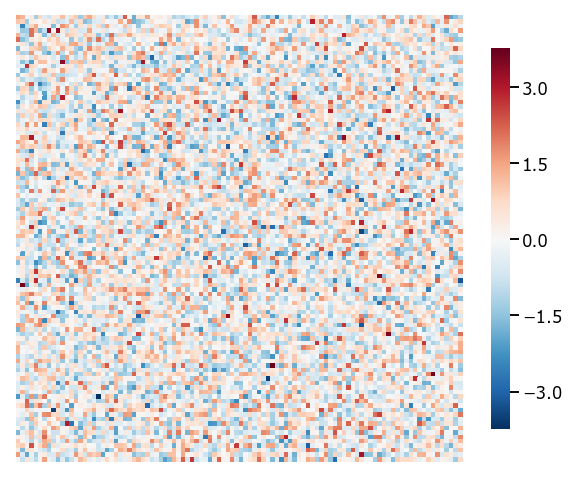

In [20]:
heatmap(A)

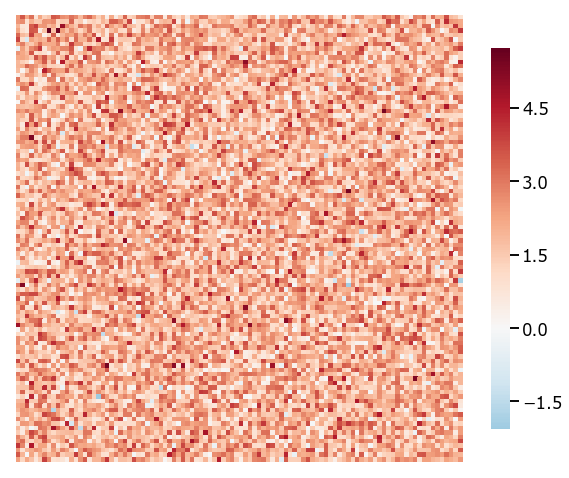

In [19]:
heatmap(B)

In [4]:
def fill_inputs(nmc, graph_type):
    inputs = []
    n_arr = np.linspace(10, 100, 10, dtype=int)
    rho_arr = np.array([0, 0.1, -0.1])
    test_names = ['pearson', 'dcorr', 'mgc']
    if graph_type == 'er':
        P1 = np.array([[0]])
        P2 = np.array([[0]])
        k = 1
    elif graph_type == 'er_marg':
        P1 = np.array([[0]])
        P2 = np.array([[2]])
        k = 1
    elif graph_type == 'sbm':
        P1 = np.array([[2, 0], [0, 2]])
        P2 = np.array([[2, 0], [0, 2]])
        k = 2
    elif graph_type == 'sbm_marg':
        P1 = np.array([[2, 0], [0, 2]])
        P2 = np.array([[4, 2], [2, 4]])
        k = 2

    for name in test_names:
        for i, rho in enumerate(rho_arr):
            for j, n in enumerate(n_arr):
                inputs.append((name, rho, n, k, P1, P2, nmc, graph_type))
    return inputs